# Fantasy vs Romance Movie Ratings

## **Research Question:** Is Fantasy or Romance genre higher rated?

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
%matplotlib inline

## IMDB Movie Dataset is the dataset used for this project

In [2]:
# Read IMBD Movie Datasets
movies = pd.read_csv('../[1] Python for Data Science/Week 4 - Pandas/Week-4-Pandas/movielens/movies.csv', sep=',')
ratings = pd.read_csv('../[1] Python for Data Science/Week 4 - Pandas/Week-4-Pandas/movielens/ratings.csv', sep=',', parse_dates=['timestamp'])

## Initial Exploration

In [3]:
# movies dataframe
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# ratings dataframe
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [5]:
movies.shape

(62423, 3)

In [6]:
ratings.shape

(25000095, 4)

In [7]:
# Cleaning the data
# Do not need the userID or timestamp so deleting those columns from the ratings dataframe
del ratings['timestamp']
del ratings['userId']

## Cleaning the Data

In [8]:
# Check if there are any null values in movies dateframe
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

In [9]:
# Check if there are any null values in ratings dateframe
ratings.isnull().any()

movieId    False
rating     False
dtype: bool

In [10]:
# Using the mean rating for each movie to evaluate 
avg_rating = ratings.groupby('movieId', as_index=False).mean()
avg_rating.head()

,movieId,rating
0,1,3.893708
1,2,3.251527
2,3,3.142028
3,4,2.853547
4,5,3.058434


## Merge the Dataframes

In [11]:
# Merge the movies and avg_rating dataframes using the movieID
moviedf = movies.merge(avg_rating, on='movieId', how='inner')
moviedf.head()

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547
4,5,Father of the Bride Part II (1995),Comedy,3.058434


## Filter by Genre & Rating

In [12]:
fantasy = moviedf['genres'].str.contains('Fantasy')
moviedf[fantasy][:10]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,3.936725
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy,2.654624
55,56,Kids of the Round Table (1995),Adventure|Children|Comedy|Fantasy,1.915385
59,60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy,3.095889
124,126,"NeverEnding Story III, The (1994)",Adventure|Children|Fantasy,2.318661
186,188,"Prophecy, The (1995)",Fantasy|Horror|Mystery,3.333473
187,189,Reckless (1995),Comedy|Fantasy,2.991776
199,201,Three Wishes (1995),Drama|Fantasy,3.001458


In [13]:
romance = moviedf['genres'].str.contains('Romance')
moviedf[romance][:10]

,movieId,title,genres,rating
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547
6,7,Sabrina (1995),Comedy|Romance,3.363666
10,11,"American President, The (1995)",Comedy|Drama|Romance,3.657171
14,15,Cutthroat Island (1995),Action|Adventure|Romance,2.719022
16,17,Sense and Sensibility (1995),Drama|Romance,3.948806
24,25,Leaving Las Vegas (1995),Drama|Romance,3.677304
27,28,Persuasion (1995),Drama|Romance,4.030000
32,33,Wings of Courage (1995),Adventure|Romance|IMAX,3.023077
34,35,Carrington (1995),Drama|Romance,3.479290


In [14]:
# There are movies that are both Fantasy and Romance
moviedf[fantasy & romance][:10]

,movieId,title,genres,rating
255,258,"Kid in King Arthur's Court, A (1995)",Adventure|Children|Comedy|Fantasy|Romance,2.628133
262,265,Like Water for Chocolate (Como agua para choco...,Drama|Fantasy|Romance,3.921668
390,395,Desert Winds (1995),Drama|Fantasy|Romance,3.166667
501,506,Orlando (1992),Drama|Fantasy|Romance,3.495283
579,587,Ghost (1990),Comedy|Drama|Fantasy|Romance|Thriller,3.434212
587,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,3.680920
621,631,All Dogs Go to Heaven 2 (1996),Adventure|Animation|Children|Fantasy|Musical|R...,2.723913
772,788,"Nutty Professor, The (1996)",Comedy|Fantasy|Romance|Sci-Fi,2.811083
922,943,"Ghost and Mrs. Muir, The (1947)",Drama|Fantasy|Romance,3.812191
932,953,It's a Wonderful Life (1946),Children|Drama|Fantasy|Romance,4.032859


In [15]:
# Filter out any movie genres that contain Fantasy and Romance for this analysis
filtered_genres = moviedf[fantasy | romance]
filtered_genres.head(10)

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547
6,7,Sabrina (1995),Comedy|Romance,3.363666
10,11,"American President, The (1995)",Comedy|Drama|Romance,3.657171
14,15,Cutthroat Island (1995),Action|Adventure|Romance,2.719022
16,17,Sense and Sensibility (1995),Drama|Romance,3.948806
24,25,Leaving Las Vegas (1995),Drama|Romance,3.677304
27,28,Persuasion (1995),Drama|Romance,4.030000


In [16]:
# Now need to filter out the unwanted genres
expanded_genres = filtered_genres['genres'].str.get_dummies(sep='|')
movie_genres = pd.concat([filtered_genres, expanded_genres['Fantasy'], expanded_genres['Romance']], axis = 1)
movie_genres.head()

,movieId,title,genres,rating,Fantasy,Romance
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,1,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,1,0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,0,1
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,0,1
6,7,Sabrina (1995),Comedy|Romance,3.363666,0,1


In [17]:
# Creating separate Fantasy dataframe
Fantasy = (movie_genres[movie_genres['Fantasy'] == 1][['movieId', 'title', 'rating']])
Fantasy.head()

,movieId,title,rating
0,1,Toy Story (1995),3.893708
1,2,Jumanji (1995),3.251527
28,29,"City of Lost Children, The (Cité des enfants p...",3.936725
43,44,Mortal Kombat (1995),2.654624
55,56,Kids of the Round Table (1995),1.915385


In [18]:
# Creating separate Romance dataframe
Romance = (movie_genres[movie_genres['Romance'] == 1][['movieId', 'title', 'rating']])
Romance.head()

,movieId,title,rating
2,3,Grumpier Old Men (1995),3.142028
3,4,Waiting to Exhale (1995),2.853547
6,7,Sabrina (1995),3.363666
10,11,"American President, The (1995)",3.657171
14,15,Cutthroat Island (1995),2.719022


In [19]:
# Fantasy ratings statistics
Fantasy['rating'].describe()

count    2667.000000
mean        3.020801
std         0.725699
min         0.500000
25%         2.625000
50%         3.096154
75%         3.500000
max         5.000000
Name: rating, dtype: float64

In [20]:
# Romance ratings statistics
Romance['rating'].describe()

count    7305.000000
mean        3.147095
std         0.659274
min         0.500000
25%         2.833333
50%         3.217391
75%         3.528736
max         5.000000
Name: rating, dtype: float64

## Romance genre has higher mean & median ratings than Fantasy genre so Romance is more popular

## Graph Results

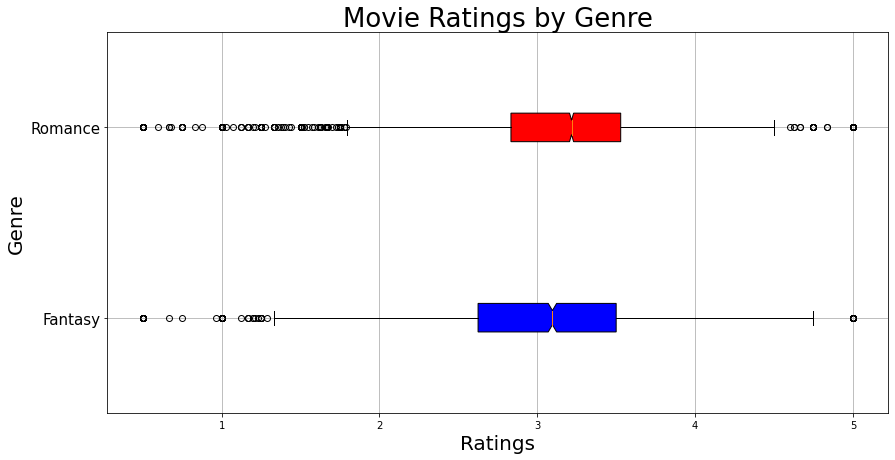

In [21]:
# Graph results in a boxplot
X1 = Fantasy['rating']
X2 = Romance['rating']
data = [X1, X2]

fig = plt.figure(figsize =(14, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)

colors = ['blue', 'red']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
# Labels   
ax.set_yticklabels(['Fantasy', 'Romance'],fontsize=15)
ax.set_xlabel('Ratings',fontsize=20) 
ax.set_ylabel('Genre',fontsize=20) 
plt.title('Movie Ratings by Genre',fontsize=26)
plt.grid(True) 
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
plt.show()

## Romance genre is more popular rated than Fantasy genre